In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Veri setini yükle
try:
    file_path = r'C:\Users\fehmi\PycharmProjects\Big_Data101\kayseri_kaza_verileri.xlsx'
    accident_data = pd.read_excel(file_path)
    print("Veri seti başarıyla yüklendi.")
except FileNotFoundError:
    print("Belirtilen dosya bulunamadı.")
    exit()
except Exception as e:
    print("Bir hata oluştu:", e)
    exit()

Veri seti başarıyla yüklendi.


In [3]:
# Kazaya karışan araç sayısı sütununu seçme
vehicle_count = accident_data[['TASIT SAYISI']]

# Eksik değerleri doldurma
imputer = SimpleImputer(strategy='median')
vehicle_count_imputed = imputer.fit_transform(vehicle_count)

# Ölçeklendirme
scaler = StandardScaler()
scaled_vehicle_count = scaler.fit_transform(vehicle_count_imputed)

# K-means algoritması
num_clusters = 3  # veya 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Modeli veriye uygula ve kümeleme yap
clusters = kmeans.fit_predict(scaled_vehicle_count)

# Küme merkezlerini al
cluster_centers = kmeans.cluster_centers_

# Sonuçları veri setine ekle
accident_data['Cluster'] = clusters

In [4]:
# Kümeleme sonuçlarını ve küme merkezlerini yazdır
print(f"{num_clusters} kümeleme için elde edilen küme merkezleri:\n{cluster_centers}")
print(f"\nKazaların {num_clusters} kümeleme sonuçları:\n{accident_data.head()}")


3 kümeleme için elde edilen küme merkezleri:
[[ 0.3994783 ]
 [-1.12629124]
 [ 3.78219894]]

Kazaların 3 kümeleme sonuçları:
                X               Y        X.1        Y.1   KAZA TURU  \
0  35508782834207  38707161168583  38.707161  35.508783  Yaralamali   
1  35434624154945  38735652082362  38.735652  35.434624  Yaralamali   
2  35529938002123  38733578034397  38.733578  35.529938  Yaralamali   
3  35551174358534  38677216094917  38.677216  35.551174  Yaralamali   
4  35458740002115  38689680085274  38.689680  35.458740  Yaralamali   

   KGM ciddiyet seviyesi  Kaza Ciddiyet Seviyesi  AY MEVSİM  KAZA SAAT  ...  \
0                      3                       0   1    kis        0.0  ...   
1                      3                       0   1    kis       17.0  ...   
2                      3                       0   1    kis       20.0  ...   
3                     30                       4   1    kis        7.0  ...   
4                     18                       2   1  

In [1]:
import matplotlib.pyplot as plt

# Her bir küme için kazaya karışan araç sayısının dağılımını gösteren histogramlar
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.hist(accident_data[accident_data['Cluster'] == i]['TASIT SAYISI'], bins=20, alpha=0.5, label=f'Cluster {i}')
plt.xlabel('Kazaya Karışan Araç Sayısı')
plt.ylabel('Kaza Sayısı')
plt.title(f'Kümeleme Sonuçları ({num_clusters} Küme)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'num_clusters' is not defined

<Figure size 1000x600 with 0 Axes>

Veri seti başarıyla yüklendi.


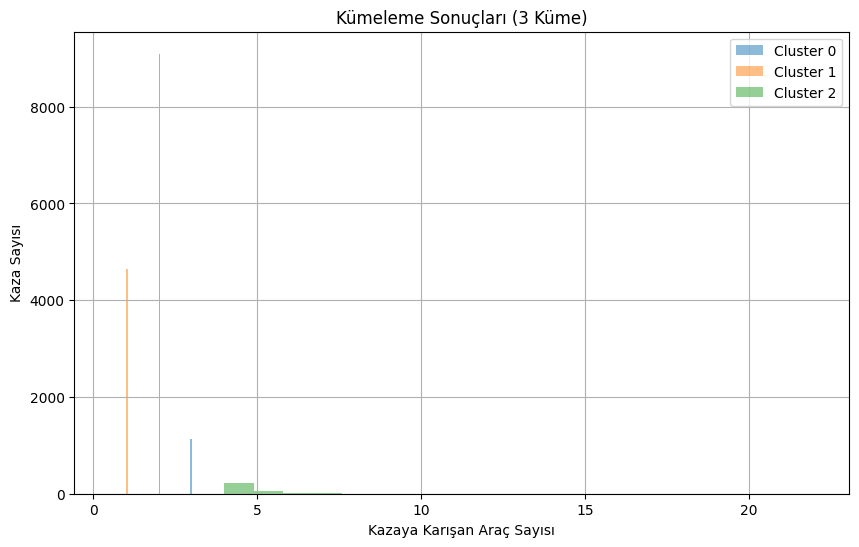

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Veri setini yükle
try:
    file_path = r'C:\Users\fehmi\PycharmProjects\Big_Data101\kayseri_kaza_verileri.xlsx'
    accident_data = pd.read_excel(file_path)
    print("Veri seti başarıyla yüklendi.")
except FileNotFoundError:
    print("Belirtilen dosya bulunamadı.")
    exit()
except Exception as e:
    print("Bir hata oluştu:", e)
    exit()

# Kazaya karışan araç sayısı sütununu seçme
vehicle_count = accident_data[['TASIT SAYISI']]

# Eksik değerleri doldurma
imputer = SimpleImputer(strategy='median')
vehicle_count_imputed = imputer.fit_transform(vehicle_count)

# Ölçeklendirme
scaler = StandardScaler()
scaled_vehicle_count = scaler.fit_transform(vehicle_count_imputed)

# K-means algoritması
num_clusters = 3  # veya 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Modeli veriye uygula ve kümeleme yap
clusters = kmeans.fit_predict(scaled_vehicle_count)

# Küme merkezlerini al
cluster_centers = kmeans.cluster_centers_

# Sonuçları veri setine ekle
accident_data['Cluster'] = clusters

# Her bir küme için kazaya karışan araç sayısının dağılımını gösteren histogramlar
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.hist(accident_data[accident_data['Cluster'] == i]['TASIT SAYISI'], bins=20, alpha=0.5, label=f'Cluster {i}')
plt.xlabel('Kazaya Karışan Araç Sayısı')
plt.ylabel('Kaza Sayısı')
plt.title(f'Kümeleme Sonuçları ({num_clusters} Küme)')
plt.legend()
plt.grid(True)
plt.show()
